In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

#Uploading csv's that have item sales for every quarter of the year.
q1_path = "/Users/jose/Desktop/Projects/VICE CITY BEAN/Square CSV/q1_2025.csv"
q2_path = "/Users/jose/Desktop/Projects/VICE CITY BEAN/Square CSV/q2_2025.csv"
q3_path = "/Users/jose/Desktop/Projects/VICE CITY BEAN/Square CSV/q3_2025.csv"
q4_path = "/Users/jose/Desktop/Projects/VICE CITY BEAN/Square CSV/q4_2025.csv"


q1_2025 = pd.read_csv(q1_path, low_memory=False)
q2_2025 = pd.read_csv(q2_path, low_memory=False)
q3_2025 = pd.read_csv(q3_path, low_memory=False)
q4_2025 = pd.read_csv(q4_path, low_memory=False)

In [2]:
#combining all df into one so I can find trends throughout the year.

sales_2025 = pd.concat([q1_2025,q2_2025,q3_2025,q4_2025])

In [3]:
print(sales_2025.info())

<class 'pandas.core.frame.DataFrame'>
Index: 192095 entries, 0 to 48661
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   192095 non-null  object 
 1   Time                   192095 non-null  object 
 2   Time Zone              192095 non-null  object 
 3   Category               191879 non-null  object 
 4   Item                   192095 non-null  object 
 5   Qty                    192095 non-null  float64
 6   Price Point Name       120866 non-null  object 
 7   SKU                    165 non-null     float64
 8   Modifiers Applied      71206 non-null   object 
 9   Gross Sales            192095 non-null  float64
 10  Discounts              192095 non-null  object 
 11  Net Sales              192095 non-null  float64
 12  Tax                    192095 non-null  object 
 13  Transaction ID         192095 non-null  object 
 14  Payment ID             192095 non-null  ob

In [4]:
#converting object to datetime.

sales_2025['Date'] = pd.to_datetime(sales_2025['Date'])

In [5]:
#print(sales_2025.head())

In [6]:
#Getting the week number to group sales by week.

weekly_df = sales_2025['Date'].dt.isocalendar()

In [7]:
#print(weekly_df.head())

In [8]:
#Adding the week number to original df and making another column with month to be able to group by week or month.

sales_2025['Week'] = weekly_df['week']
sales_2025['Month'] = sales_2025['Date'].dt.strftime('%B')

In [9]:
print(sales_2025.head())

        Date      Time                   Time Zone          Category  \
0 2025-01-31  19:42:36  Eastern Time (US & Canada)  COFFEE BEVERAGES   
1 2025-01-31  19:31:53  Eastern Time (US & Canada)  COFFEE BEVERAGES   
2 2025-01-31  19:31:53  Eastern Time (US & Canada)       BAKED GOODS   
3 2025-01-31  19:29:45  Eastern Time (US & Canada)  COFFEE BEVERAGES   
4 2025-01-31  19:22:22  Eastern Time (US & Canada)       BAKED GOODS   

               Item  Qty       Price Point Name  SKU Modifiers Applied  \
0        Cappuccino  1.0                    NaN  NaN               NaN   
1             Latte  2.0                Regular  NaN     Vanilla, Iced   
2           Cookies  1.0  Chocolate Chip Cookie  NaN               NaN   
3  Cold Brew Coffee  1.0                    NaN  NaN               NaN   
4        Croissants  2.0        Plain Croissant  NaN               NaN   

   Gross Sales  ... Itemization Type  Commission          Employee  \
0         5.00  ...    Physical Good       $0.00  Cl

In [10]:
#removing columns I don't need for the analysis.

sales_ordered = sales_2025[['Date','Week','Month','Category','Item','Price Point Name', 'Qty','Gross Sales','Channel']].copy()

#print(sales_ordered.head())
#print(sales_ordered.info())

In [11]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

#Convert to a Categorical type with the defined order
sales_ordered['Month'] = pd.Categorical(sales_ordered['Month'], categories=month_order, ordered=True)


We need to create a kitchen production schedule. A couple of the items our bakers make are able to be frozen and cooked fresh at each cafe. We're going to start with those items and figure out how many we're selling every month. These sales don't take into account damaged or wasted product so we'll need to keep that in mind to keep up with demand. We'll start with cookies, quiche, scone, and cinnamon rolls.


In [13]:
cookies = sales_ordered[sales_ordered['Item']=='Cookies'].copy()

In [14]:
print(cookies['Price Point Name'].unique())

['Chocolate Chip Cookie' 'Pistachio Chocolate Chip'
 'Double Chocolate Cookie' 'Coconut Guava']


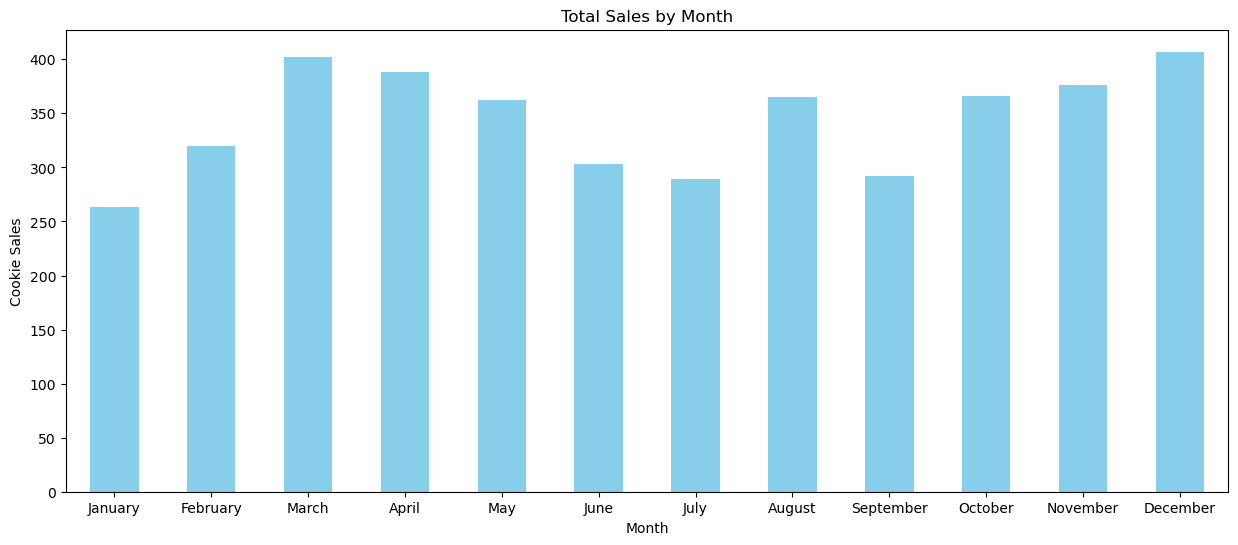

In [15]:
#Creating a pivot table of all cookeis sold grouped by month
cookies_pivot = cookies.pivot_table(index='Month', values='Qty', aggfunc='sum', observed=False)

#Plotting the pivot table result
cookies_pivot.plot(kind='bar', color='skyblue', legend=False, width=0.5, figsize=(15, 6))
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Cookie Sales')
plt.xticks(rotation=0)
plt.show()

In [16]:
#Printing pivot table values.
print(cookies_pivot)

             Qty
Month           
January    263.0
February   320.0
March      402.0
April      388.0
May        362.0
June       303.0
July       289.0
August     365.0
September  292.0
October    366.0
November   376.0
December   407.0


In [17]:
#Doing the same as above but with each cookie individually.

chocolate_chip = cookies[cookies['Price Point Name'] == 'Chocolate Chip Cookie'].copy()
pistachio = cookies[cookies['Price Point Name'] == 'Pistachio Chocolate Chip'].copy()
double_chocolate = cookies[cookies['Price Point Name'] == 'Double Chocolate Cookie'].copy()
coco_guava = cookies[cookies['Price Point Name'] == 'Coconut Guava'].copy()

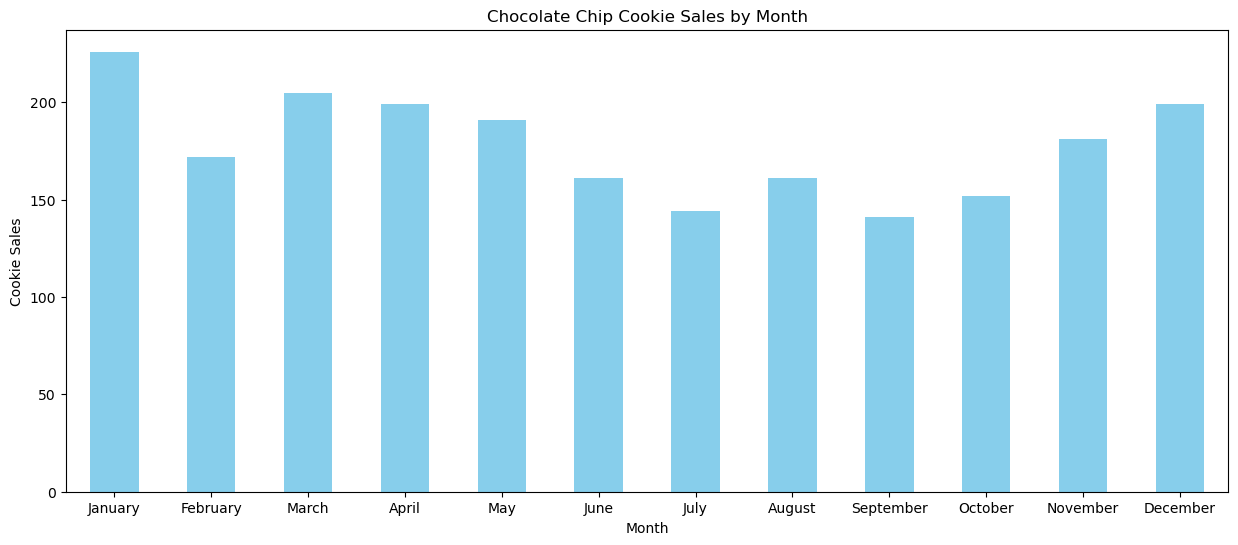

In [18]:
chocolate_chip_pivot = chocolate_chip.pivot_table(index='Month', values='Qty', aggfunc='sum', observed=False)
chocolate_chip_pivot = chocolate_chip_pivot.rename(columns={'Qty': 'Chocolate Chip'})

chocolate_chip_pivot.plot(kind='bar', color='skyblue', legend=False, width=0.5, figsize=(15, 6))
plt.title('Chocolate Chip Cookie Sales by Month')
plt.xlabel('Month')
plt.ylabel('Cookie Sales')
plt.xticks(rotation=0)
plt.show()

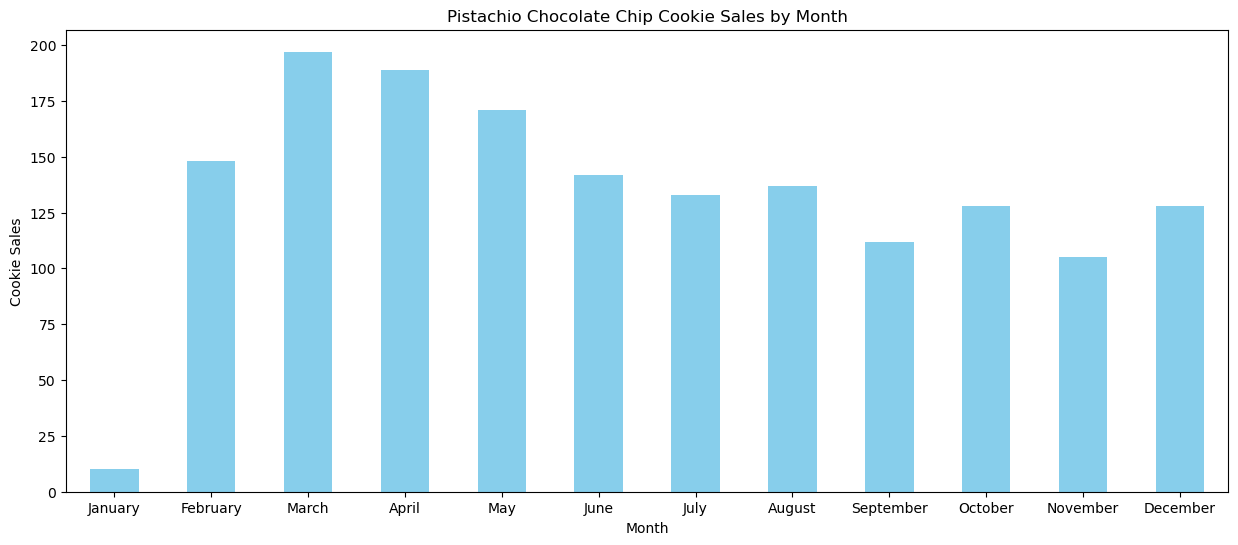

In [19]:
pistachio_pivot = pistachio.pivot_table(index='Month', values='Qty', aggfunc='sum', observed=False)
pistachio_pivot = pistachio_pivot.rename(columns={'Qty': 'Pistachio'})

pistachio_pivot.plot(kind='bar', color='skyblue', legend=False, width=0.5, figsize=(15, 6))
plt.title('Pistachio Chocolate Chip Cookie Sales by Month')
plt.xlabel('Month')
plt.ylabel('Cookie Sales')
plt.xticks(rotation=0)
plt.show()

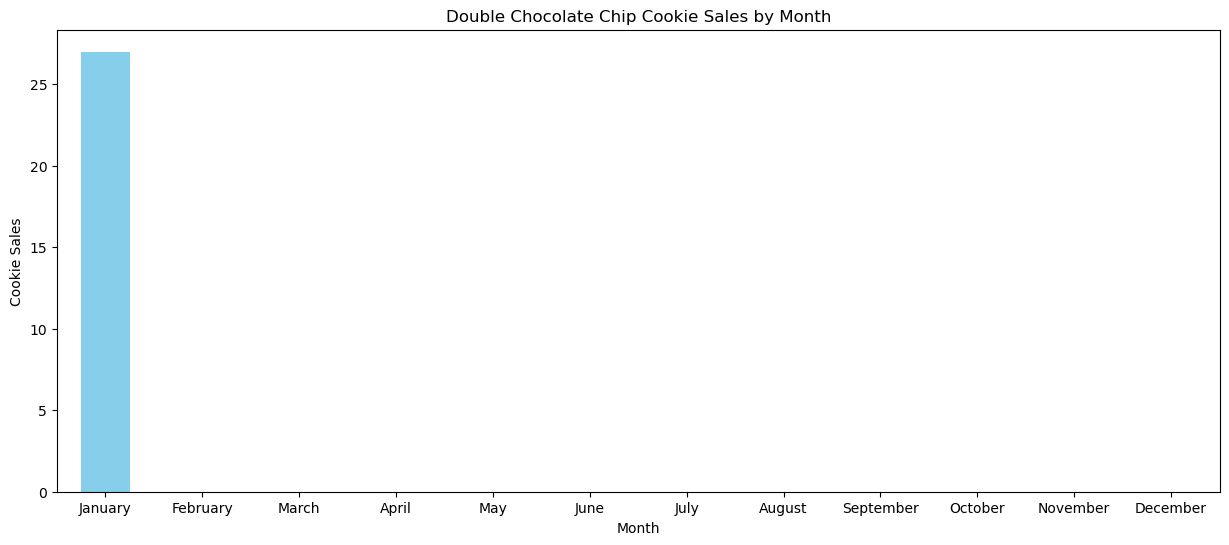

In [20]:
double_chocolate_pivot = double_chocolate.pivot_table(index='Month', values='Qty', aggfunc='sum', observed=False)

double_chocolate_pivot.plot(kind='bar', color='skyblue', legend=False, width=0.5, figsize=(15, 6))
plt.title('Double Chocolate Chip Cookie Sales by Month')
plt.xlabel('Month')
plt.ylabel('Cookie Sales')
plt.xticks(rotation=0)
plt.show()

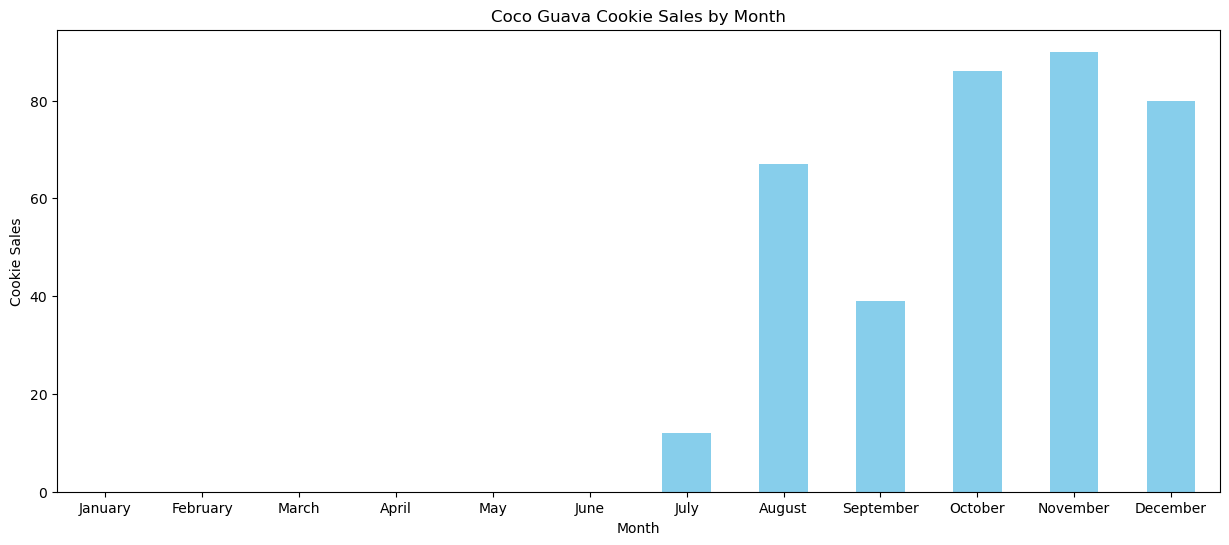

In [21]:
coco_guava_pivot = coco_guava.pivot_table(index='Month', values='Qty', aggfunc='sum', observed=False)
coco_guava_pivot = coco_guava_pivot.rename(columns={'Qty': 'Coco Guava'})

coco_guava_pivot.plot(kind='bar', color='skyblue', legend=False, width=0.5, figsize=(15, 6))
plt.title('Coco Guava Cookie Sales by Month')
plt.xlabel('Month')
plt.ylabel('Cookie Sales')
plt.xticks(rotation=0)
plt.show()

In [22]:
#Combining pivots of cookies we currently sell. Stopped production on double chocolate so will not be adding that flavor.
cookie_pivots_combined = pd.concat([chocolate_chip_pivot, pistachio_pivot, coco_guava_pivot], axis=1)

In [23]:
print(cookie_pivots_combined)

           Chocolate Chip  Pistachio  Coco Guava
Month                                           
January             226.0       10.0         0.0
February            172.0      148.0         0.0
March               205.0      197.0         0.0
April               199.0      189.0         0.0
May                 191.0      171.0         0.0
June                161.0      142.0         0.0
July                144.0      133.0        12.0
August              161.0      137.0        67.0
September           141.0      112.0        39.0
October             152.0      128.0        86.0
November            181.0      105.0        90.0
December            199.0      128.0        80.0


In [77]:
#Not including the average sales of coco guava because it was introduced late into the month and that will skew results.
#Also the only cookie that can't be frozen and baked fresh so we wouldn't be able to produce in bulk.

print('The average amount of chocolate chip cookies we sell in a month is:', round(cookie_pivots_combined['Chocolate Chip'].mean()))
print('The standard deviation of chocolate chip cookies we sell in a month is:', round(cookie_pivots_combined['Chocolate Chip'].std()))
print()
print('The average amount of pistachio chocolate chip cookies we sell in a month is:', round(cookie_pivots_combined['Pistachio'].mean()))
print('The standard deviation of pistachio chocolate chip cookies we sell in a month is:', round(cookie_pivots_combined['Pistachio'].std()))

The average amount of chocolate chip cookies we sell in a month is: 178
The standard deviation of chocolate chip cookies we sell in a month is: 27

The average amount of pistachio chocolate chip cookies we sell in a month is: 133
The standard deviation of pistachio chocolate chip cookies we sell in a month is: 48


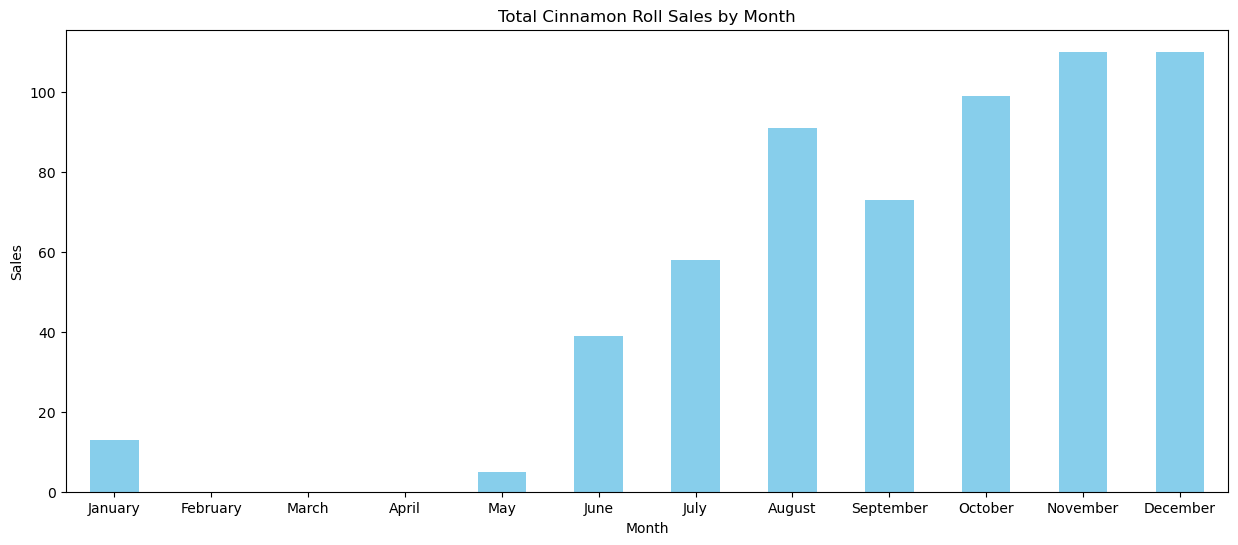

In [25]:
#Going to do the same thing with cinnamon rolls.
cinnamon_rolls = sales_ordered[sales_ordered['Item']=='Cinnamon Rolls'].copy()

#Creating a pivot table of all cinnamon rolls sold grouped by month
cinnamon_pivot = cinnamon_rolls.pivot_table(index='Month', values='Qty', aggfunc='sum', observed=False)

#Plotting the pivot table result
cinnamon_pivot.plot(kind='bar', color='skyblue', legend=False, width=0.5, figsize=(15, 6))
plt.title('Total Cinnamon Roll Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

In [26]:
print(cinnamon_pivot)

             Qty
Month           
January     13.0
February     0.0
March        0.0
April        0.0
May          5.0
June        39.0
July        58.0
August      91.0
September   73.0
October     99.0
November   110.0
December   110.0


In [94]:
#Going to take the average of last 6 months because we stopped production in first half of the year.

last6_temp = [39,58,91,73,99,110,110]
last6 = np.array(last6_temp)

print('The average amount of cinnamon rolls sold per month is:', round(last6.mean()))
print('With a standard deviation of:', round(last6.std()))

The average amount of cinnamon rolls sold per month is: 83
With a standard deviation of: 25


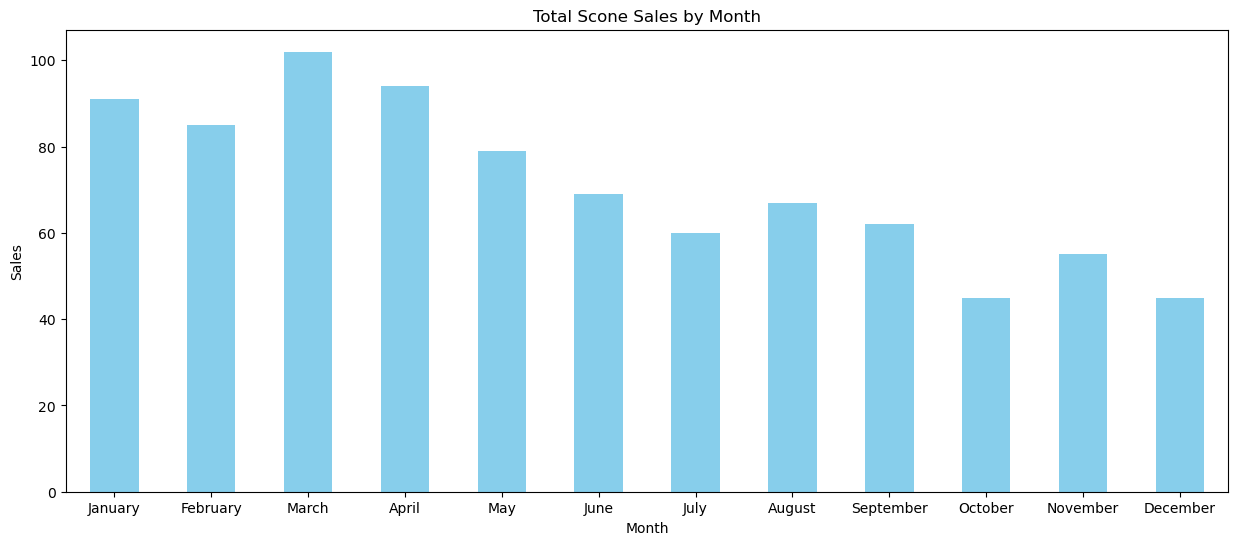

In [28]:
#Going to do the same thing with scones.
scones = sales_ordered[sales_ordered['Item']=='Berry Scones'].copy()

#Creating a pivot table of all scones sold grouped by month
scone_pivot = scones.pivot_table(index='Month', values='Qty', aggfunc='sum', observed=False)

#Plotting the pivot table result
scone_pivot.plot(kind='bar', color='skyblue', legend=False, width=0.5, figsize=(15, 6))
plt.title('Total Scone Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

In [29]:
print(scone_pivot)

             Qty
Month           
January     91.0
February    85.0
March      102.0
April       94.0
May         79.0
June        69.0
July        60.0
August      67.0
September   62.0
October     45.0
November    55.0
December    45.0


In [96]:
print('The average amount of scones sold per month is:', round(scone_pivot['Qty'].mean()))
print('With a standard deviation of:', round(scone_pivot['Qty'].std()))

The average amount of scones sold per month is: 71
With a standard deviation of: 19


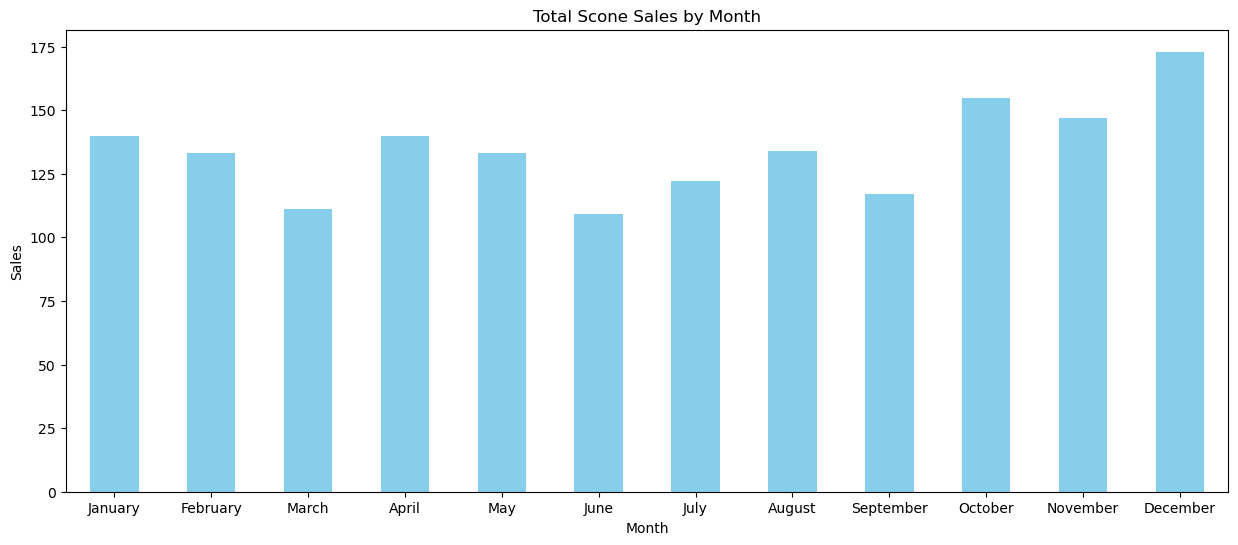

In [31]:
#Going to do the same thing with quiches.
quiche = sales_ordered[sales_ordered['Item']=='Quiche'].copy()

#Creating a pivot table of all quiches sold grouped by month
quiche_pivot = quiche.pivot_table(index='Month', values='Qty', aggfunc='sum', observed=False)

#Plotting the pivot table result
quiche_pivot.plot(kind='bar', color='skyblue', legend=False, width=0.5, figsize=(15, 6))
plt.title('Total Quiche Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

In [32]:
print(quiche['Price Point Name'].unique())

['Quiche & Salad' 'Quiche Slice' nan 'Mushroom & Caramelized Onion Quiche'
 'Mushroom & Caramelized Onion Quiche + Salad' 'Ham & Cheese Quiche'
 'Ham & Cheese Quiche + Salad']


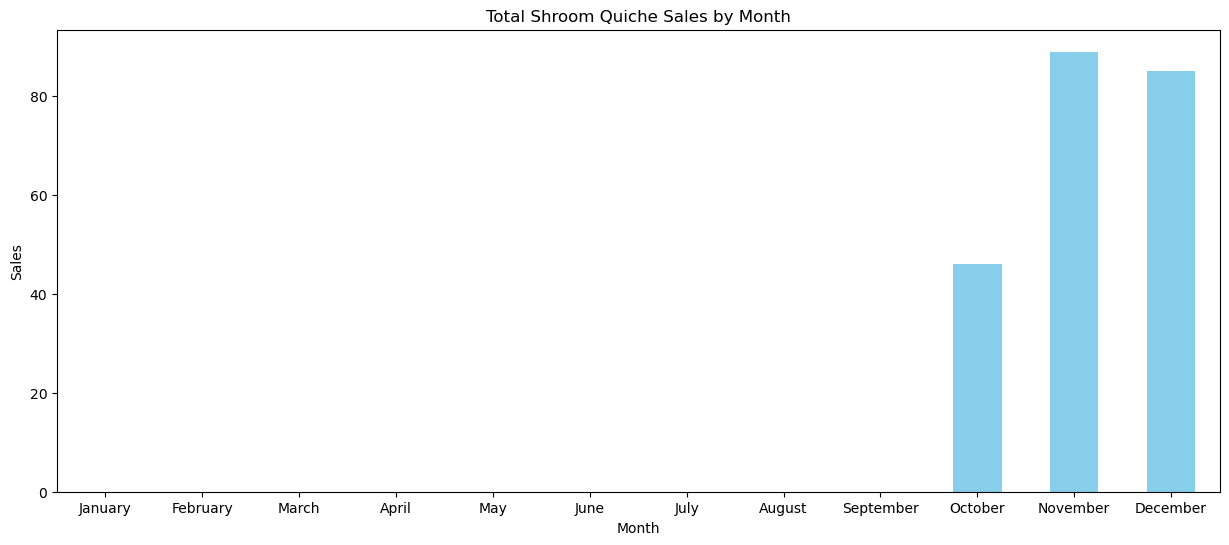

In [86]:
#Seperating quiches by flavor. We changed to mini quiches with multiple flavors sometime in october.
#Starting with mushroom and onion quiche.
shroom_quiche = sales_ordered[sales_ordered['Price Point Name'].str.contains("Onion", na=False)].copy()

#Creating a pivot table of mushroom quiches sold grouped by month
shroom_pivot = shroom_quiche.pivot_table(index='Month', values='Qty', aggfunc='sum', observed=False)

#Plotting the pivot table result
shroom_pivot.plot(kind='bar', color='skyblue', legend=False, width=0.5, figsize=(15, 6))
plt.title('Total Shroom Quiche Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

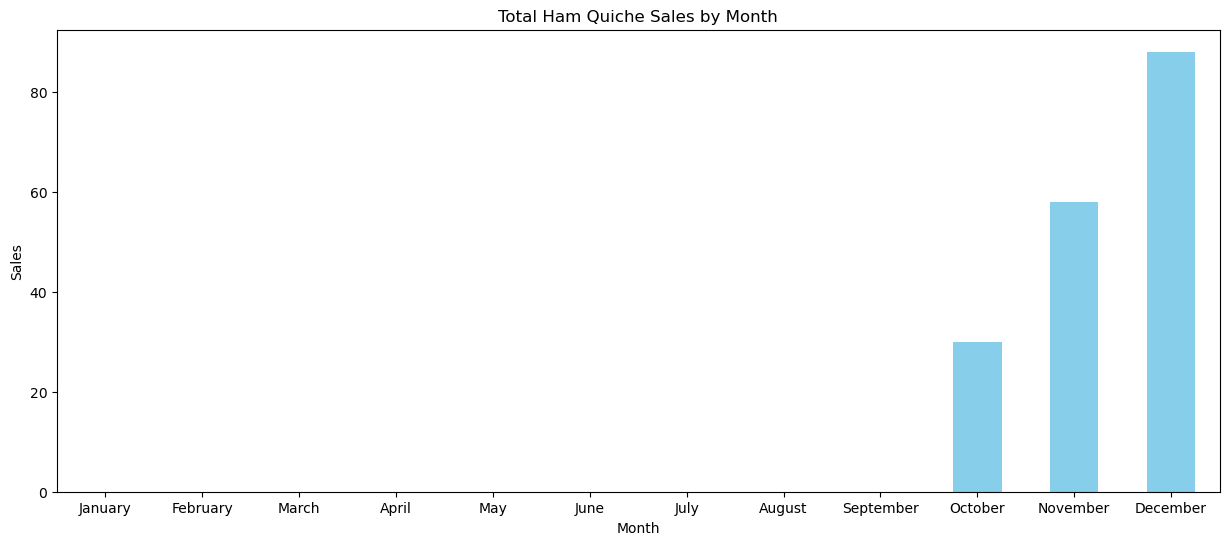

In [84]:
#Next with ham and cheese quiche.
ham_quiche = sales_ordered[sales_ordered['Price Point Name'].str.contains("Ham & Cheese Quiche", na=False)].copy()

#Creating a pivot table of ham & cheese quiches sold grouped by month
ham_pivot = ham_quiche.pivot_table(index='Month', values='Qty', aggfunc='sum', observed=False)

#Plotting the pivot table result
ham_pivot.plot(kind='bar', color='skyblue', legend=False, width=0.5, figsize=(15, 6))
plt.title('Total Ham Quiche Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

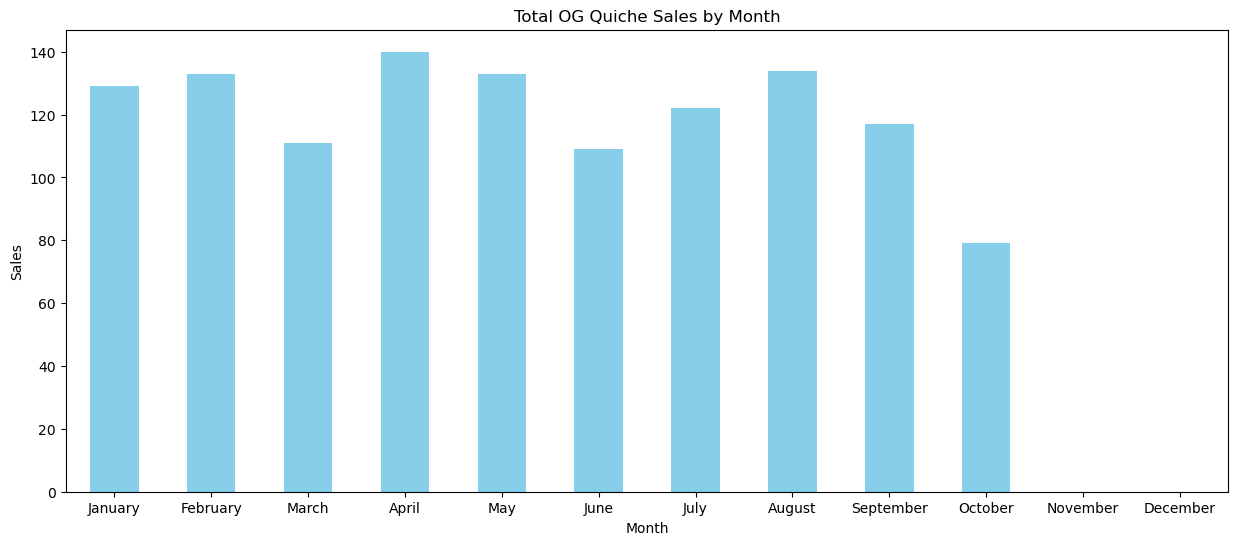

In [82]:
#Lastly with our regular quiche which we discontinued.
quiche_temp1 = sales_ordered[sales_ordered['Price Point Name'].str.contains('Quiche & Salad', na=False)].copy()
quiche_temp2 = sales_ordered[sales_ordered['Price Point Name'].str.contains('Quiche Slice', na=False)].copy()

quiche_og = pd.concat([quiche_temp1, quiche_temp2], ignore_index=True)


#Creating a pivot table of ham & cheese quiches sold grouped by month
quiche_og_pivot = quiche_og.pivot_table(index='Month', values='Qty', aggfunc='sum', observed=False)

#Plotting the pivot table result
quiche_og_pivot.plot(kind='bar', color='skyblue', legend=False, width=0.5, figsize=(15, 6))
plt.title('Total OG Quiche Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

In [36]:
#combining all quiches in one pivot table.

quiche_og_pivot = quiche_og_pivot.rename(columns={'Qty': 'Original'})
shroom_pivot = shroom_pivot.rename(columns={'Qty': 'Shroom'})
ham_pivot = ham_pivot.rename(columns={'Qty': 'Ham'})

quiche_pivots_combined = pd.concat([quiche_og_pivot, shroom_pivot, ham_pivot], axis=1)
print(quiche_pivots_combined)

           Original  Shroom   Ham
Month                            
January       129.0     0.0   0.0
February      133.0     0.0   0.0
March         111.0     0.0   0.0
April         140.0     0.0   0.0
May           133.0     0.0   0.0
June          109.0     0.0   0.0
July          122.0     0.0   0.0
August        134.0     0.0   0.0
September     117.0     0.0   0.0
October        79.0    46.0  30.0
November        0.0    89.0  58.0
December        0.0    85.0  88.0



Interesting that the most slices of regular quiche sold in a month before we introduced the mini quiches was 140. Once the mini quiches and different flavors were introduced, the most we sold in a month of both flavors combined was 173.

There are various factors that could have attributed that. That was in December which is usually one of our busiest months. We only had 1 veggie flavor before, and with the mini quiches we had 1 veggie and 1 meat option so it could have appealed to more people.

I'll take the average of all the sales to have a starting point for monthly production, but will keep an eye on sales and adjust. It's essentially 3 different products sold during different times of the year and not enough data to have a more concrete production minimum.


In [98]:
print('The average amount of quiche sold per month is:', round(quiche_pivot['Qty'].mean()))
print('With a standard deviation of:', round(quiche_pivot['Qty'].std()))

The average amount of quiche sold per month is: 134
With a standard deviation of: 19


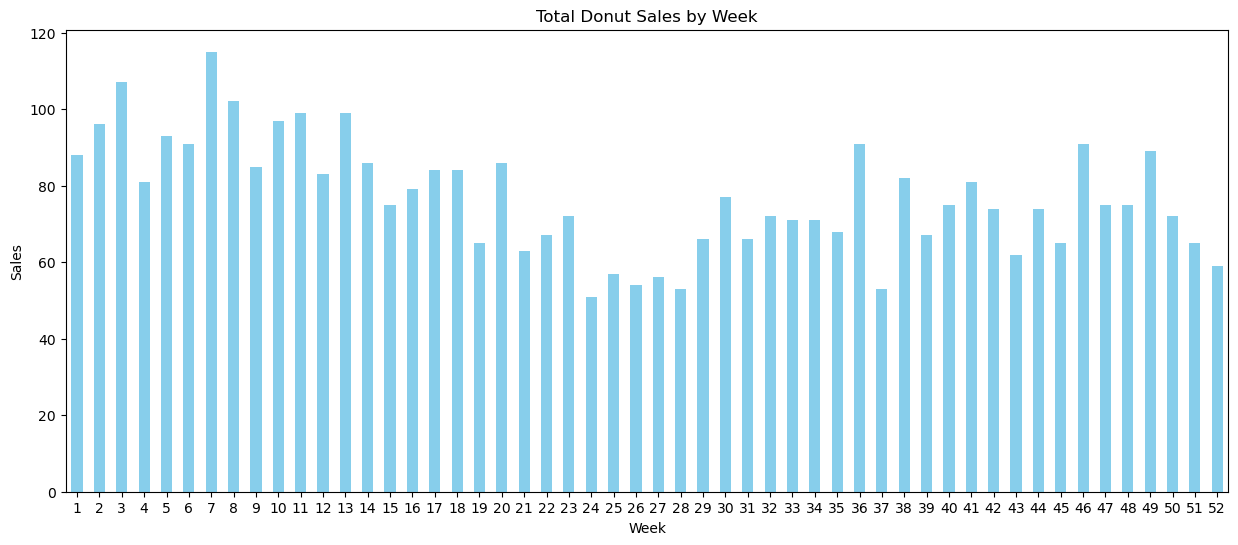

In [104]:
#Now we're going to start with products that need to be produced weekly and cannot be produced in bulk.
#These include our donuts, loaves, carrot cake, and coconut guava cookie. Let's start with our donuts together.

donut = sales_ordered[sales_ordered['Item'] == 'Donuts'].copy()

donut_pivot = donut.pivot_table(index='Week', values='Qty', aggfunc='sum', observed=False)

donut_pivot.plot(kind='bar', color='skyblue', legend=False, width=0.5, figsize=(15, 6))
plt.title('Total Donut Sales by Week')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

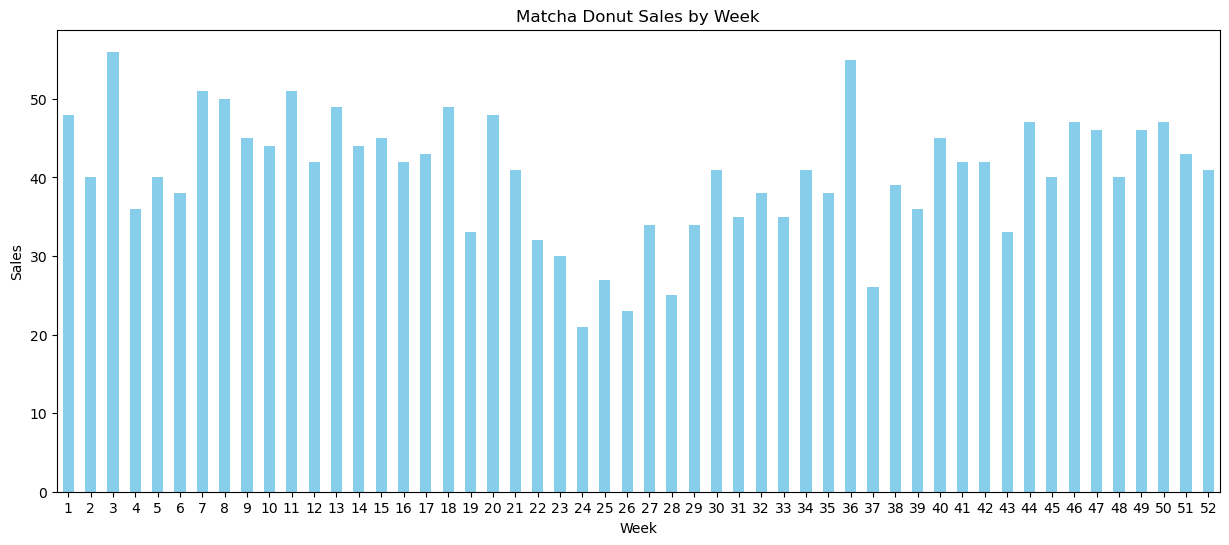

In [100]:
#Now seperating matcha donut sales. And later doing the same for our rosewater donuts. 

matcha_donut = sales_ordered[sales_ordered['Price Point Name'] == 'Matcha Donut'].copy()

matcha_donut_pivot = matcha_donut.pivot_table(index='Week', values='Qty', aggfunc='sum', observed=False)
matcha_donut_pivot = matcha_donut_pivot.rename(columns={'Qty': 'Matcha Donut'})

matcha_donut_pivot.plot(kind='bar', color='skyblue', legend=False, width=0.5, figsize=(15, 6))
plt.title('Matcha Donut Sales by Week')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

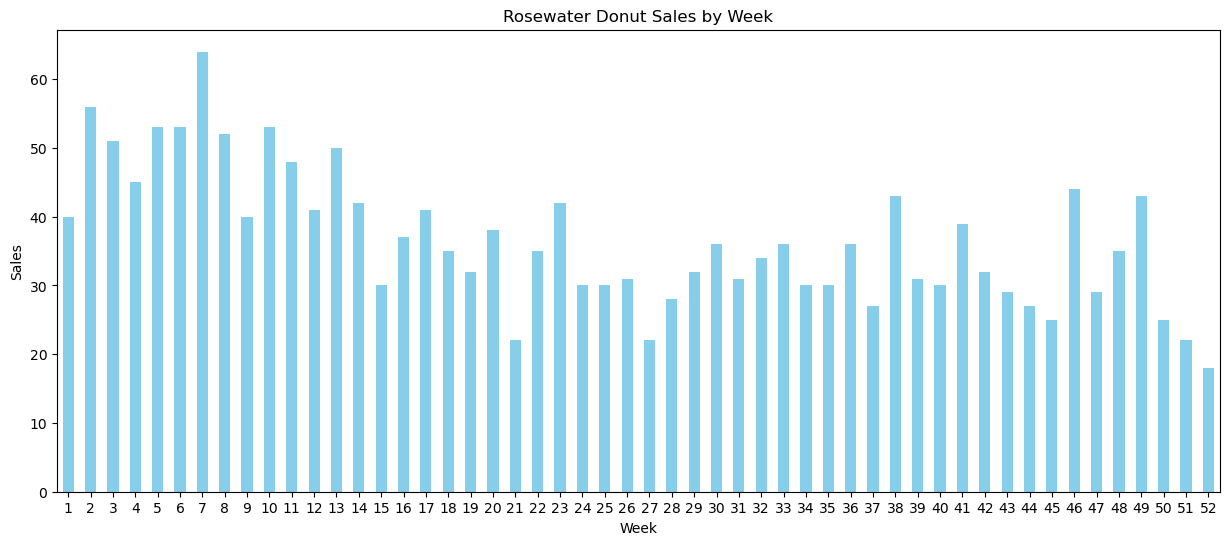

In [108]:
rose_donut = sales_ordered[sales_ordered['Price Point Name'] == 'Rosewater Donut'].copy()

rose_donut_pivot = rose_donut.pivot_table(index='Week', values='Qty', aggfunc='sum', observed=False)
rose_donut_pivot = rose_donut_pivot.rename(columns={'Qty': 'Rosewater Donut'})

rose_donut_pivot.plot(kind='bar', color='skyblue', legend=False, width=0.5, figsize=(15, 6))
plt.title('Rosewater Donut Sales by Week')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

In [120]:
print('The average matcha donuts sold per week is:', round(matcha_donut_pivot['Matcha Donut'].mean()))
print('With a standard deviation of:', round(matcha_donut_pivot['Matcha Donut'].std()))
print()
print('The average rosewater donuts sold per week is:', round(rose_donut_pivot['Rosewater Donut'].mean()))
print('With a standard deviation of:', round(rose_donut_pivot['Rosewater Donut'].std()))

The average matcha donuts sold per week is: 40
With a standard deviation of: 8

The average rosewater donuts sold per week is: 37
With a standard deviation of: 10


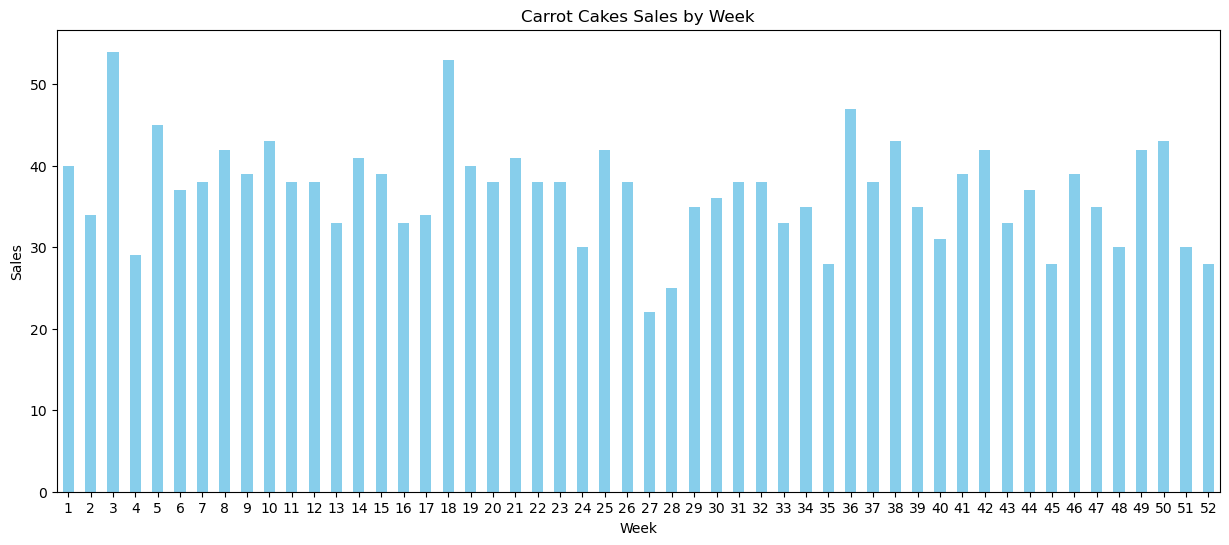

In [122]:
#Now to weekly carrot cake sales.

carrot = sales_ordered[sales_ordered['Item'] == 'Carrot Cake'].copy()

carrot_pivot = carrot.pivot_table(index='Week', values='Qty', aggfunc='sum', observed=False)

carrot_pivot.plot(kind='bar', color='skyblue', legend=False, width=0.5, figsize=(15, 6))
plt.title('Carrot Cakes Sales by Week')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

In [124]:
print('The average carrot cakes sold per week is:', round(carrot_pivot['Qty'].mean()))
print('With a standard deviation of:', round(carrot_pivot['Qty'].std()))

The average carrot cakes sold per week is: 37
With a standard deviation of: 6


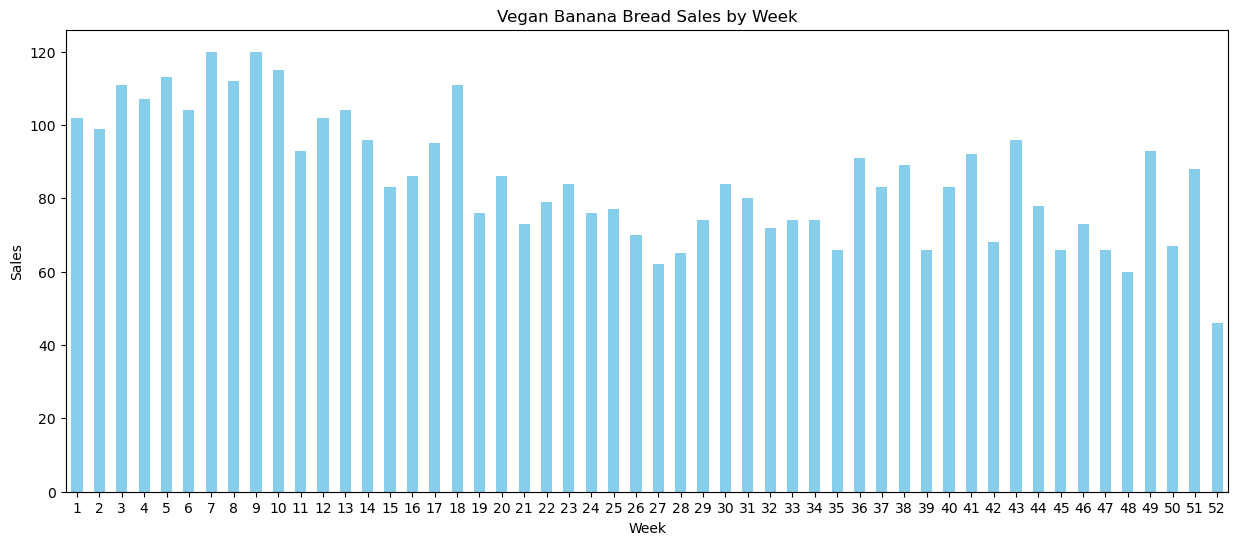

In [164]:
#Now with our vegan banana bread. Name was changed half way through the year so creating a temp variable to gather all data.

temp = sales_ordered[sales_ordered['Category'] == 'CAKES & LOAFS']
vegan_banana = temp[temp['Item'].str.contains("Nut", na=False)].copy()

vegan_banana_pivot = vegan_banana.pivot_table(index='Week', values='Qty', aggfunc='sum', observed=False)

vegan_banana_pivot.plot(kind='bar', color='skyblue', legend=False, width=0.5, figsize=(15, 6))
plt.title('Vegan Banana Bread Sales by Week')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

In [168]:
#We sell slices at the cafes, but make and deliver whole loaves. Each loaf makes 6 slices.
vegan_banana_pivot['whole loaf'] = vegan_banana_pivot['Qty']/6

print('The average vegan banana bread sold per week (slices) is:', round(vegan_banana_pivot['Qty'].mean()))
print('With a standard deviation of:', round(vegan_banana_pivot['Qty'].std()))
print()
print('The average vegan banana bread sold per week (whole loaf) is:',round(vegan_banana_pivot['whole loaf'].mean()) )
print('With a standard deviation of:',round(vegan_banana_pivot['whole loaf'].std()) )

The average vegan banana bread sold per week (slices) is: 86
With a standard deviation of: 17

The average vegan banana bread sold per week (whole loaf) is: 14
With a standard deviation of: 3


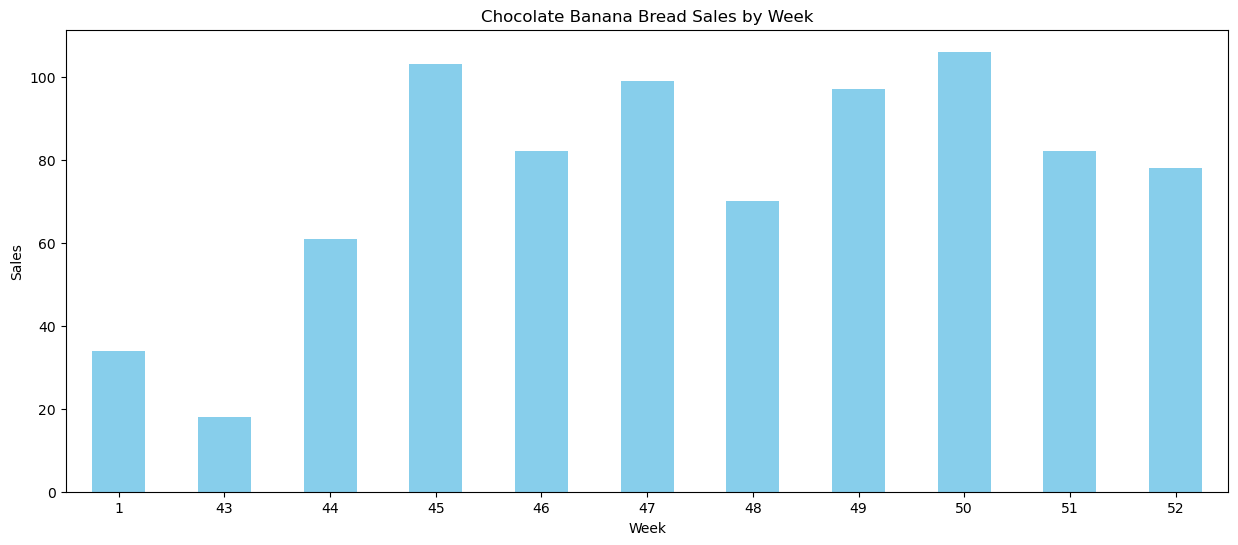

In [172]:
#Now with our chocolate banana bread. Introduced towards the end of the year so it won't have as much data.

choco_banana = sales_ordered[sales_ordered['Item'] == 'Chocolate Banana Bread'].copy()

choco_banana_pivot = choco_banana.pivot_table(index='Week', values='Qty', aggfunc='sum', observed=False)

choco_banana_pivot.plot(kind='bar', color='skyblue', legend=False, width=0.5, figsize=(15, 6))
plt.title('Chocolate Banana Bread Sales by Week')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

In [174]:
#Same situation as the vegan banana bread, made and delivered whole. Each loaf is 6 slices.

choco_banana_pivot['whole loaf'] = choco_banana_pivot['Qty']/6

print('The average vegan banana bread sold per week (slices) is:', round(choco_banana_pivot['Qty'].mean()))
print('With a standard deviation of:', round(choco_banana_pivot['Qty'].std()))
print()
print('The average vegan banana bread sold per week (whole loaf) is:',round(choco_banana_pivot['whole loaf'].mean()) )
print('With a standard deviation of:',round(choco_banana_pivot['whole loaf'].std()) )

The average vegan banana bread sold per week (slices) is: 75
With a standard deviation of: 28

The average vegan banana bread sold per week (whole loaf) is: 13
With a standard deviation of: 5


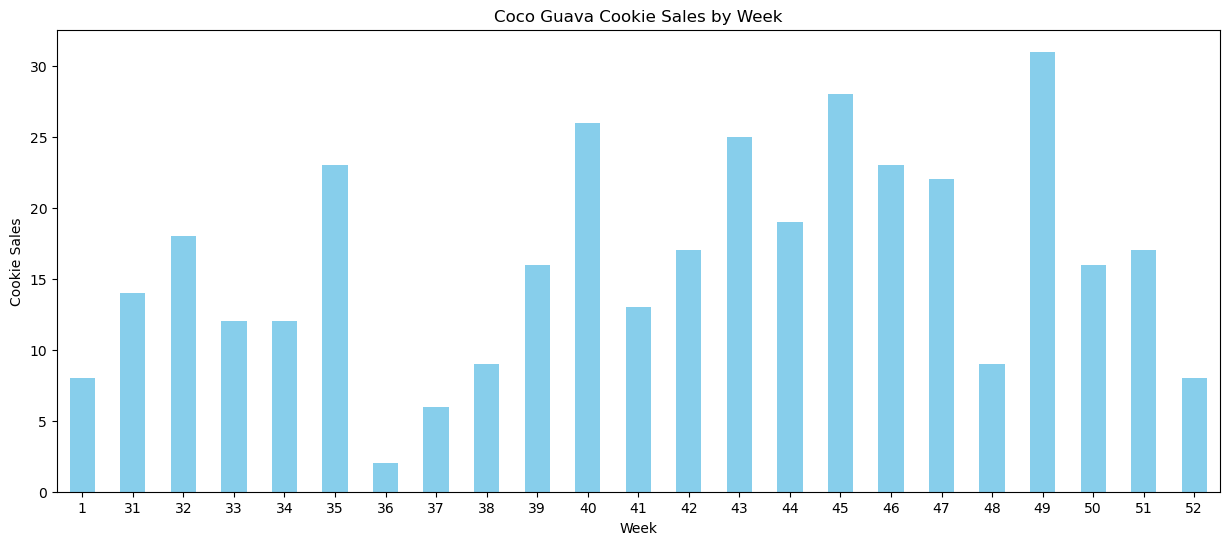

In [180]:
coco_guava_week = coco_guava.pivot_table(index='Week', values='Qty', aggfunc='sum', observed=False)
coco_guava_week = coco_guava_week.rename(columns={'Qty': 'Coco Guava'})

coco_guava_week.plot(kind='bar', color='skyblue', legend=False, width=0.5, figsize=(15, 6))
plt.title('Coco Guava Cookie Sales by Week')
plt.xlabel('Week')
plt.ylabel('Cookie Sales')
plt.xticks(rotation=0)
plt.show()

In [184]:
print('The average coco guava cookie sold per week is:', round(coco_guava_week['Coco Guava'].mean()))
print('With a standard deviation of:', round(coco_guava_week['Coco Guava'].std()))

The average vegan banana bread sold per week (slices) is: 16
With a standard deviation of: 8
